In [64]:
import pandas as pd
import numpy as np

In [92]:
df = pd.read_csv("C:/Users/91626/Desktop/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [95]:
df.rename({"Genre":"Gender"},inplace=True,axis=1)

In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
df.describe(include="all")

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [68]:
df.rename({"Genre" : "Gender"},inplace=True,axis=1)

In [69]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [70]:
basic_info(df)

This dataset has  5  columns and  200  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Coun

DATA PREPROCESSING

In [100]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [101]:
# ENCODING GENDER BY CONVERTING THEM IN 0 AND 1 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df.Gender)

In [102]:
basic_info(df)

This dataset has  4  columns and  200  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Coun

CORRELARTION ANALYSIS

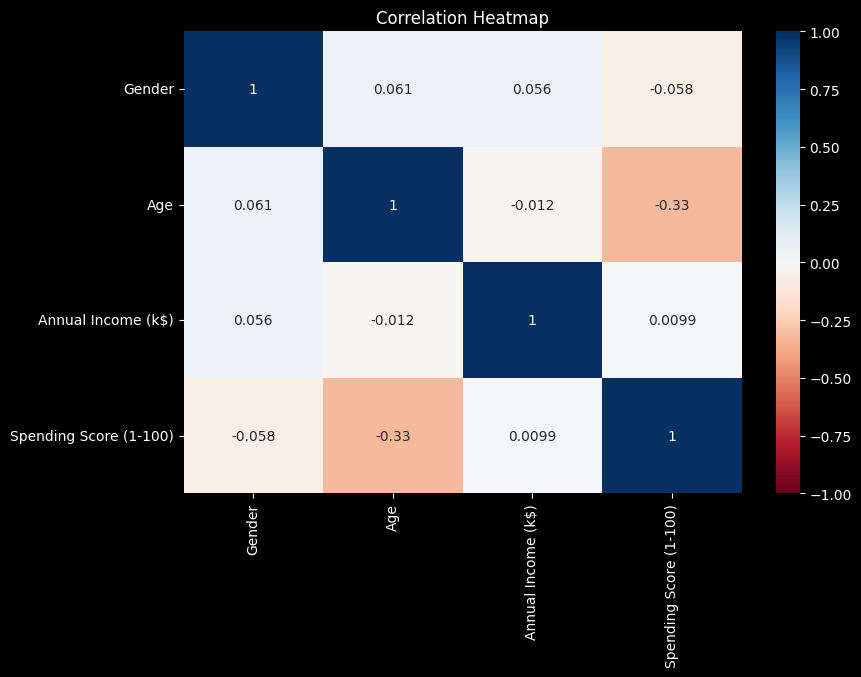

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9,6))
s = sns.heatmap(df.corr(), annot = True, cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
plt.title("Correlation Heatmap")
plt.savefig("correlation.png",bbox_inches='tight')
plt.show()

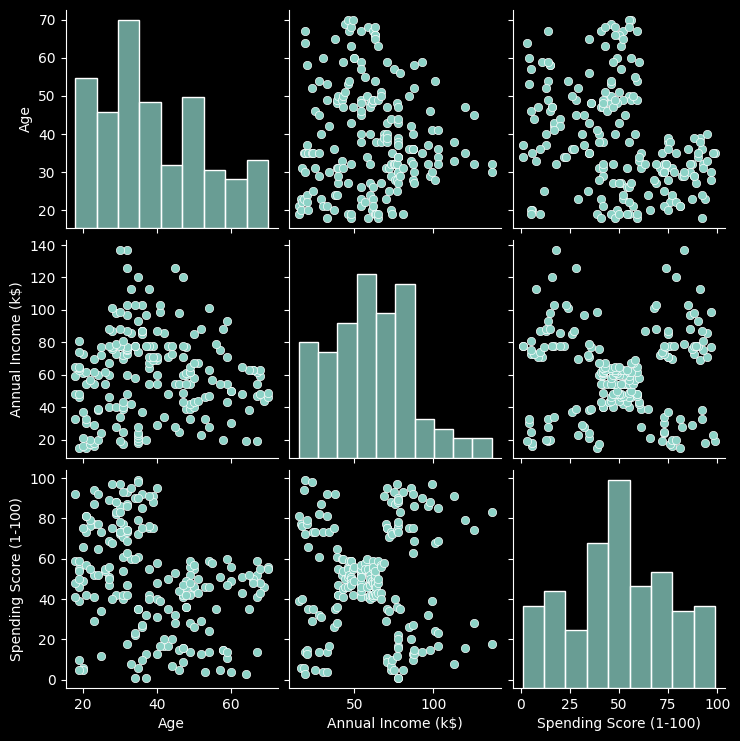

In [98]:
figure = sns.pairplot(df[['Age',
                        'Annual Income (k$)',
                        'Spending Score (1-100)']])
figure.savefig('distribution.png', dpi=400)

In [106]:
# Dropping gender column
df.drop(["Gender"],inplace=True,axis=1)
# Feature Scaling: Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

PCA ANALYSIS 

In [ ]:
from sklearn.decomposition import PCA

def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [ ]:
pca, X_pca = do_pca(3, df_std)

In [ ]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

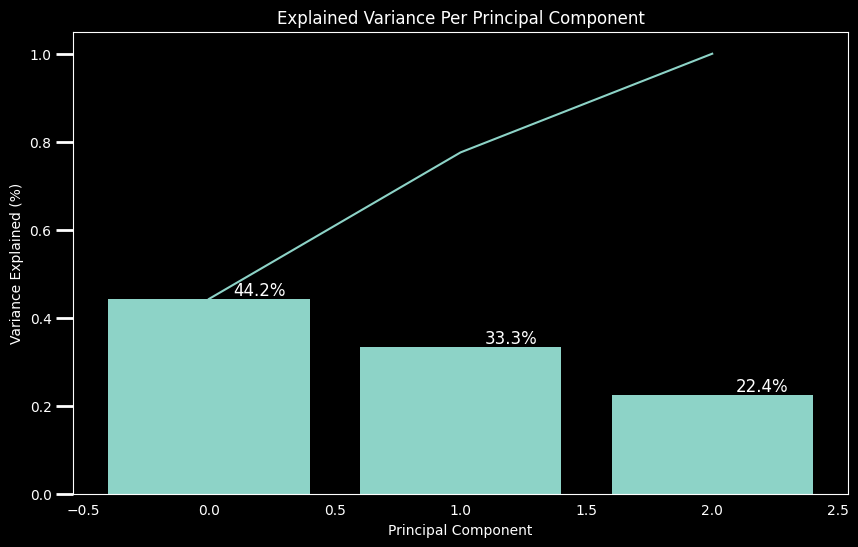

In [ ]:
scree_plot(pca)

In [ ]:
pca,X_pca = do_pca(2,df)

Text(0, 0.5, 'component 2')

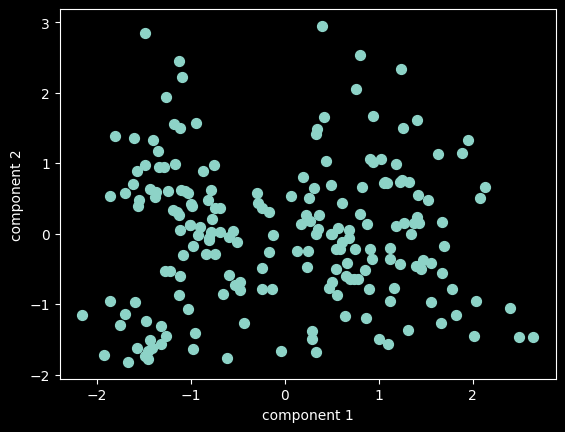

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1],  s = 50)
plt.xlabel('component 1')
plt.ylabel('component 2')

c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

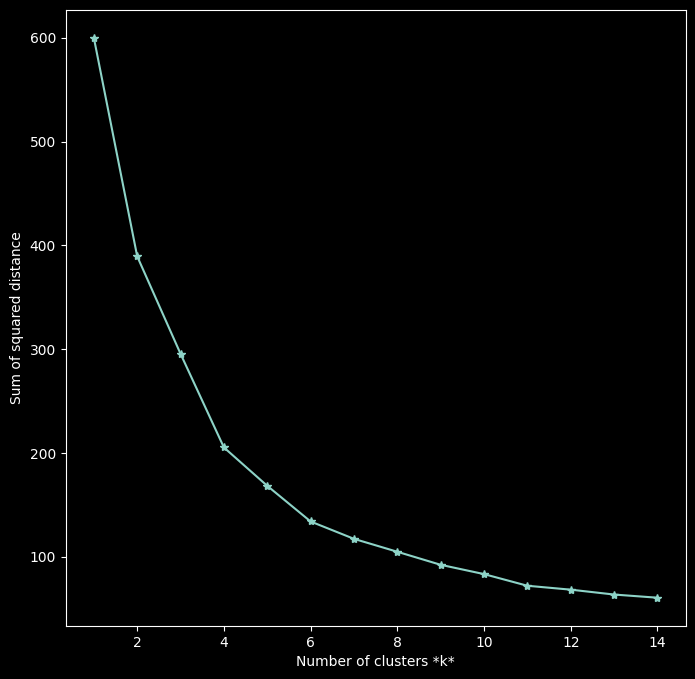

In [107]:
# using Elbow Method 

# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 15))

# Collecting sum of squared error in list
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse,"-*")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.savefig("elbow.png",bbox_inches='tight')

c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

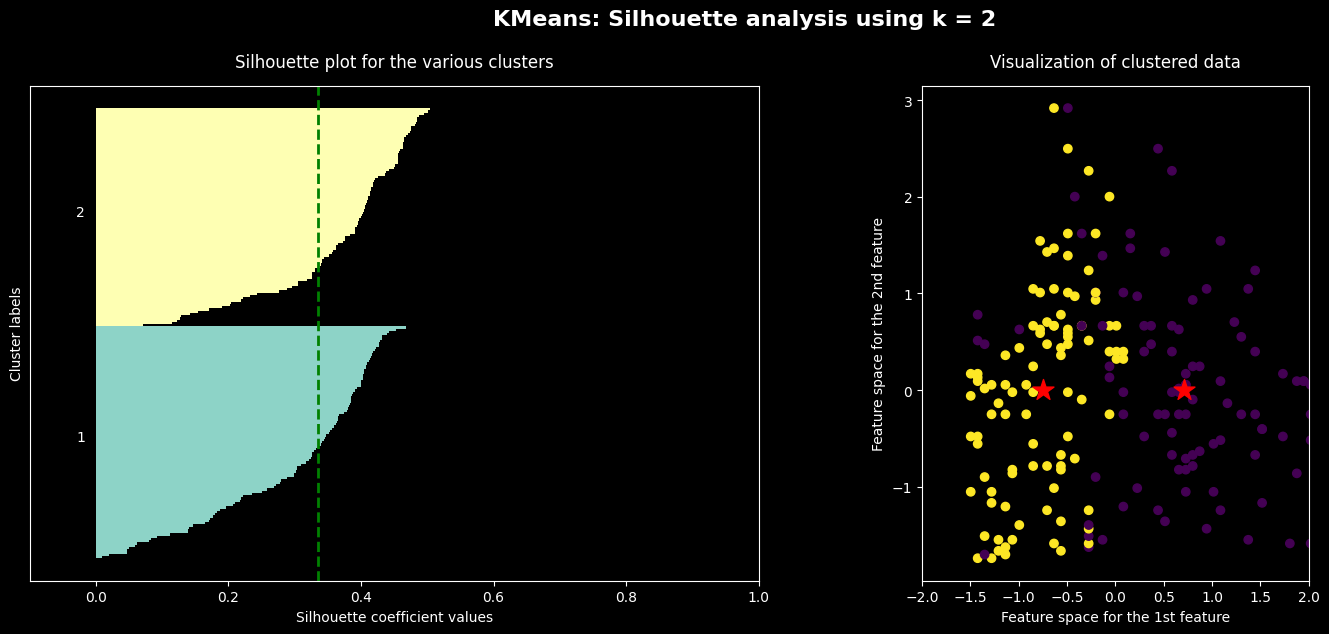

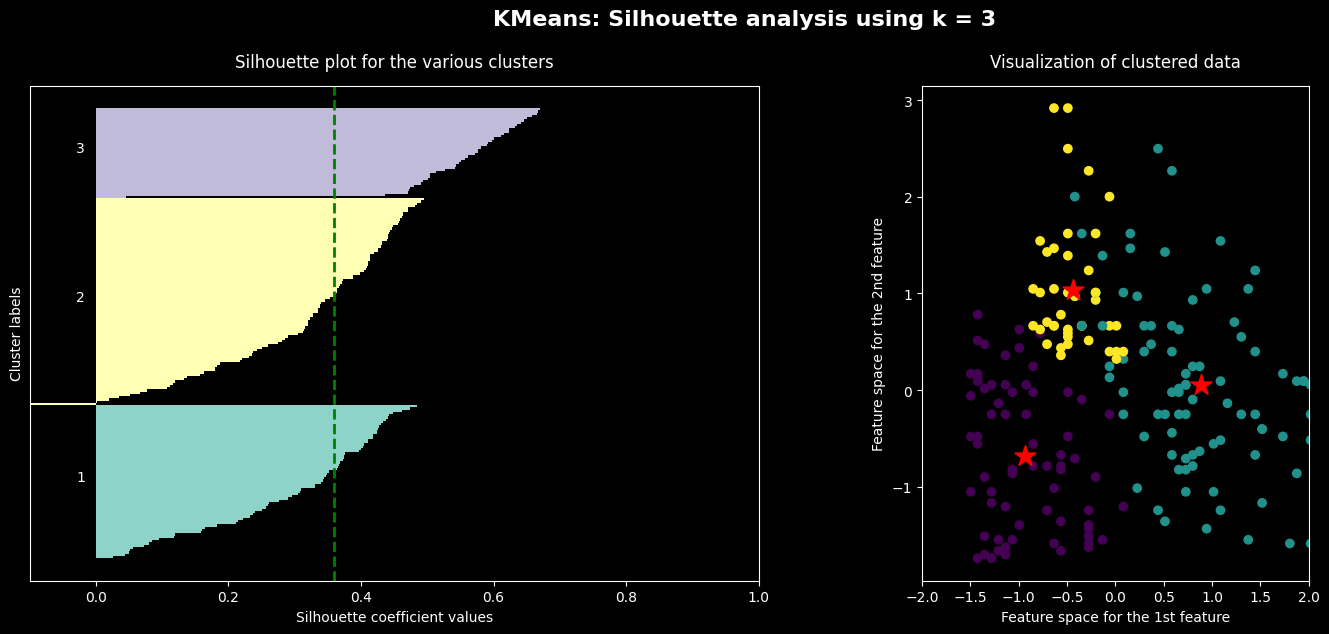

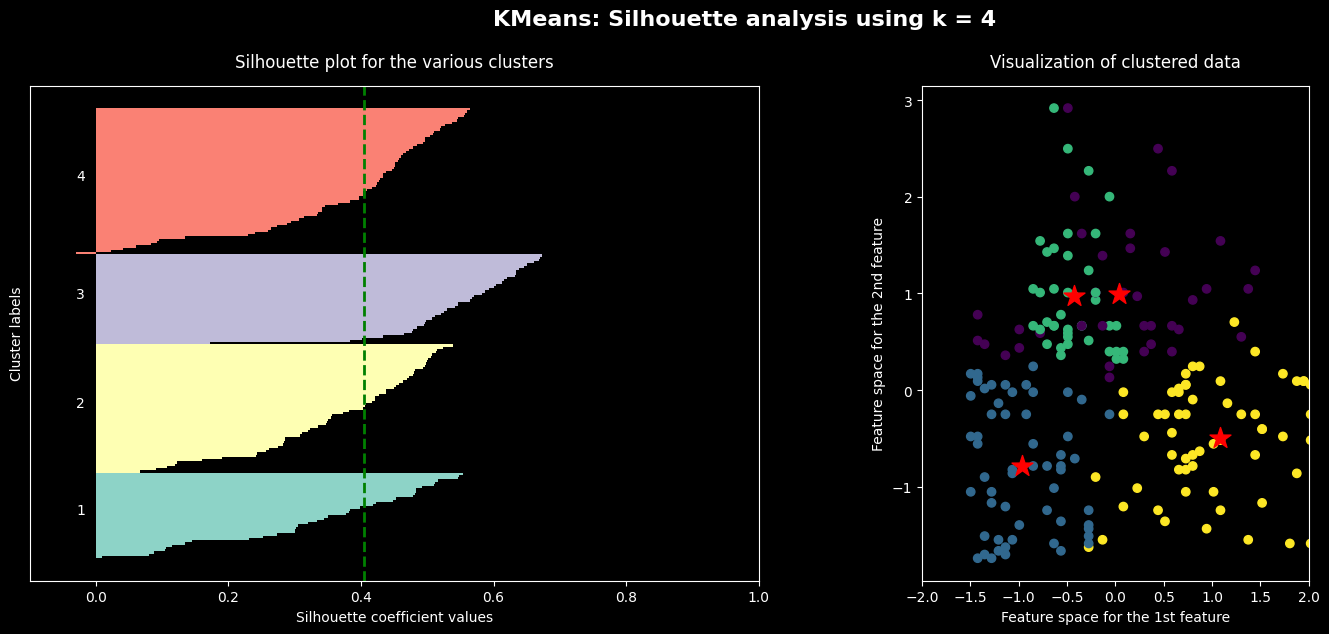

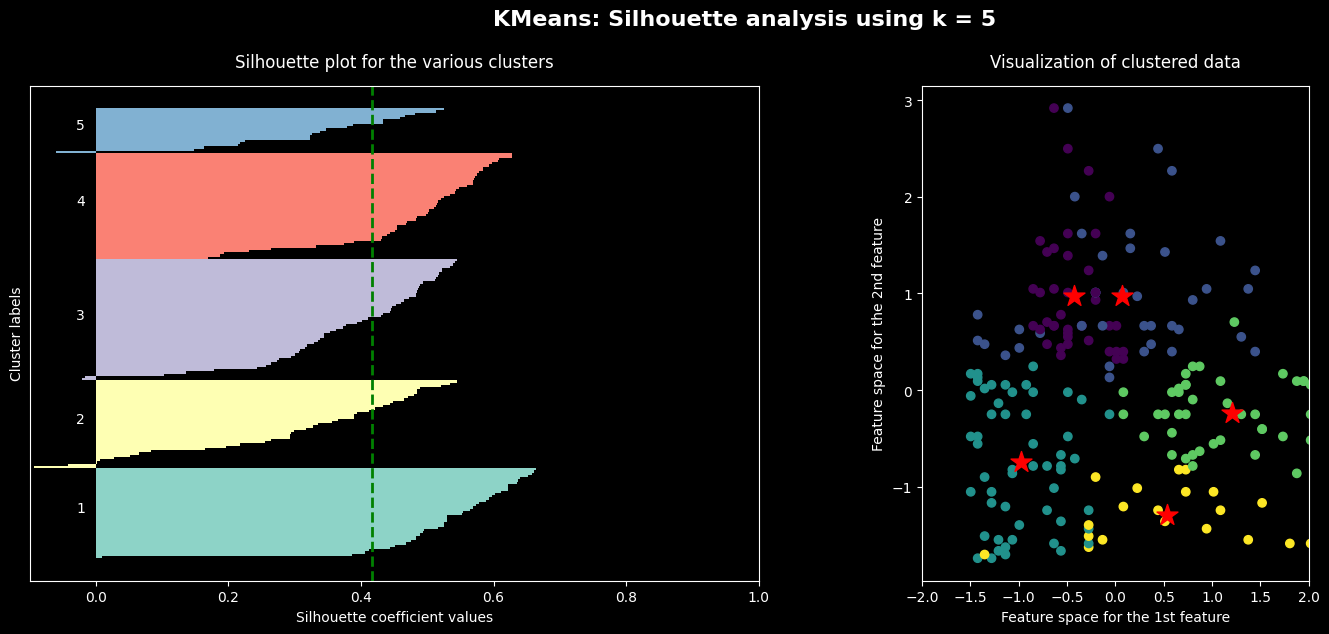

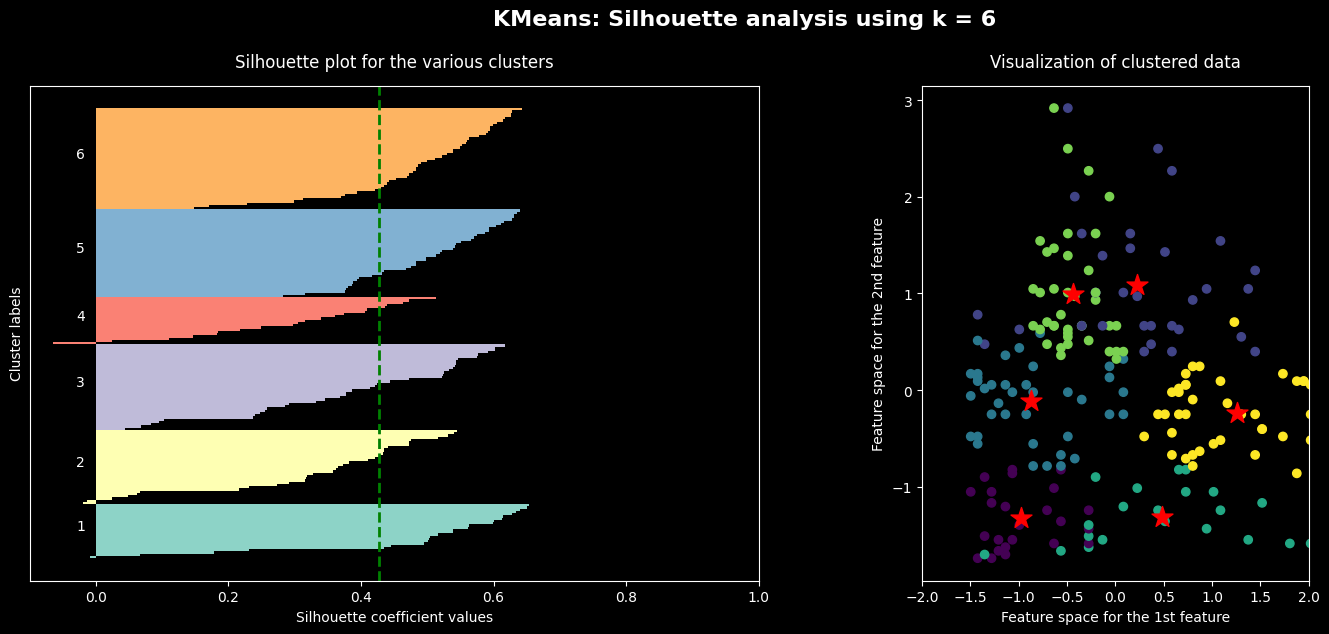

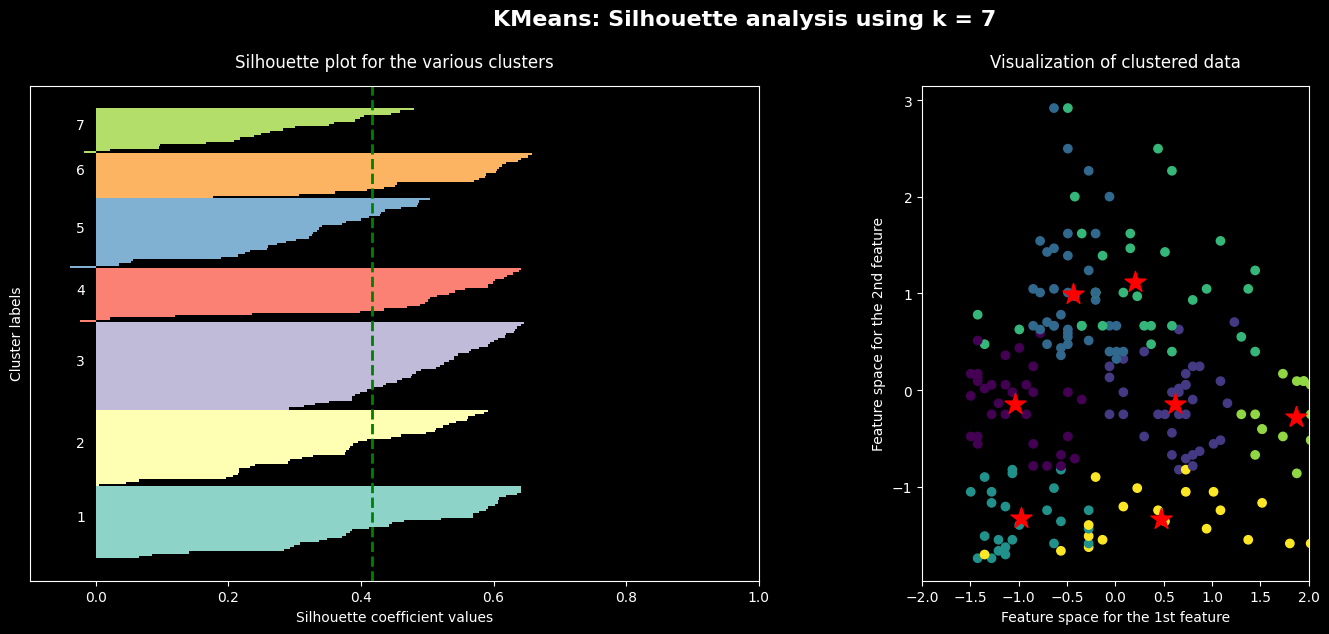

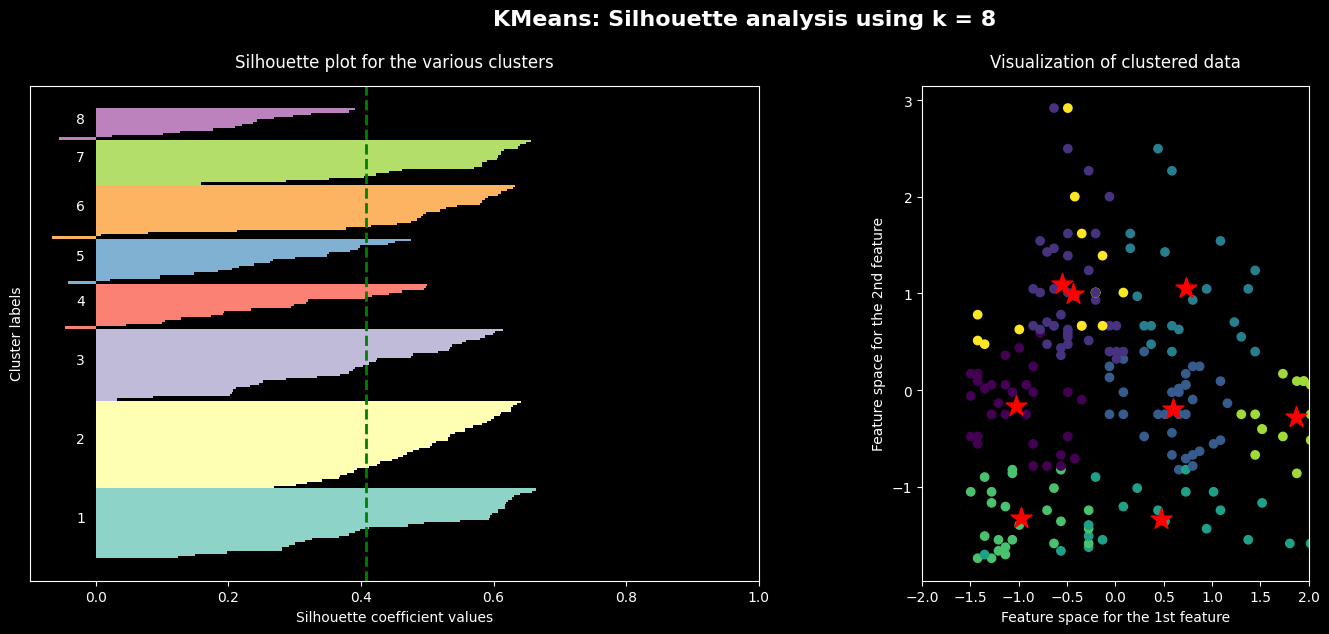

In [ ]:
# Silhouette index method
from sklearn.datasets._samples_generator import make_blobs,make_circles,make_moons
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4, 5, 6, 7, 8]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df[:, 0], df[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'KMeans: Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [108]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affini

          KM        HC      GMMs   k
0   0.335472  0.317957  0.328788   2
1   0.357793  0.321489  0.340558   3
2   0.403958  0.361451  0.260409   4
3   0.416643  0.390028  0.406367   5
4   0.426855  0.420117  0.376684   6
5   0.418077  0.398295  0.388390   7
6   0.406305  0.366479  0.386457   8
7   0.394347  0.375385  0.324851   9
8   0.427401  0.380889  0.365313  10
9   0.411678  0.381198  0.352846  11
10  0.389642  0.353572  0.335734  12
11  0.394353  0.355790  0.320974  13
12  0.378518  0.353230  0.334151  14
13  0.364120  0.345435  0.307059  15


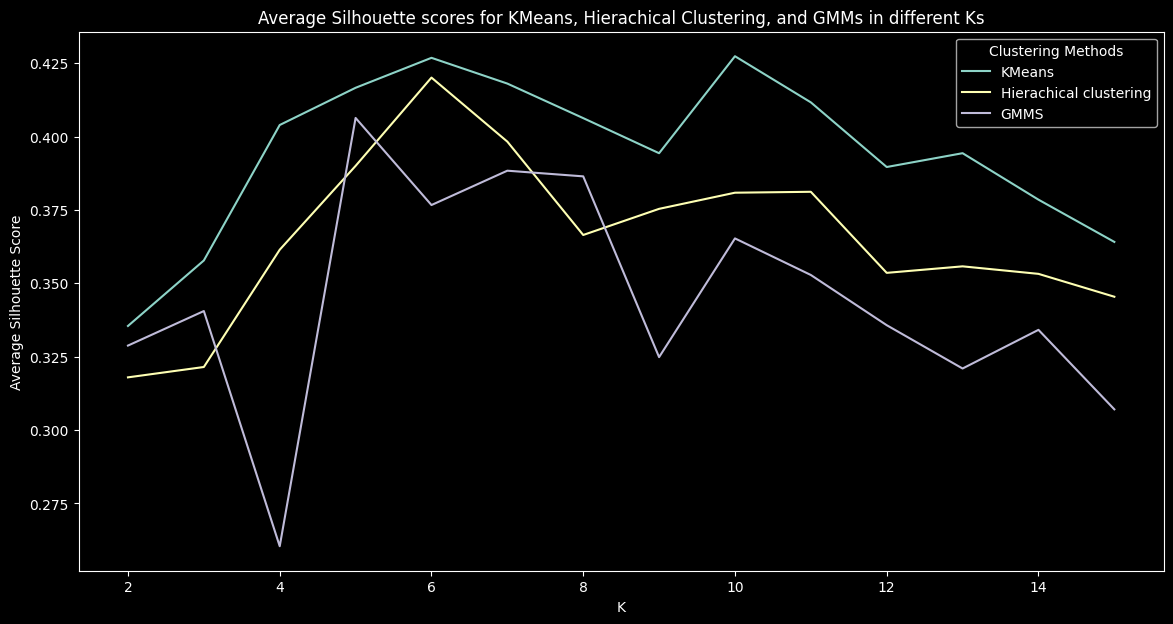

In [ ]:
def plot_km_hc_gmms_in_different_ks(df_std, start_k, end_k):
    avg_silhouette_scores = []

    for k in range(start_k, end_k+1):

        # Run the KMeans algorithm
        km = KMeans(n_clusters=k)
        km_labels = km.fit_predict(df_std)

        # Run the Hierachical clustering algorithm
        hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(df_std)
        hc_labels = hc.labels_

        # Run the GMMs algorithm
        gm = GaussianMixture(covariance_type="spherical", n_components=k, random_state=0).fit(df_std)
        gm_labels = GaussianMixture(n_components=k, random_state=0).fit_predict(df_std)

        # calculate average silhouette scores
        km_silhouette_vals = silhouette_samples(df_std, km_labels)
        hc_silhouette_vals = silhouette_samples(df_std, hc_labels)
        gm_silhouette_vals = silhouette_samples(df_std, gm_labels)
        km_avg_score = np.mean(km_silhouette_vals)
        hc_avg_score = np.mean(hc_silhouette_vals)
        gm_avg_score = np.mean(gm_silhouette_vals)
        avg_silhouette_scores.append([km_avg_score, hc_avg_score, gm_avg_score])

    df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns = ['KM', 'HC', "GMMs"])
    df_avg_silhouette_scores["k"] = range(start_k, end_k+1)
    print(df_avg_silhouette_scores)
    
    # plotting silhouette scores against number of clusters
    fig, ax = plt.subplots() # create figure and axis objects
    fig.set_size_inches(14, 7)
    ax.set_title('Average Silhouette scores for KMeans, Hierachical Clustering, and GMMs in different Ks')
    ax.plot('k', 'KM', data=df_avg_silhouette_scores) 
    ax.plot('k', 'HC', data=df_avg_silhouette_scores) 
    ax.plot('k', 'GMMs', data=df_avg_silhouette_scores) 
    ax.legend(['KMeans',"Hierachical clustering", "GMMS"], title="Clustering Methods")
    ax.set_xlabel('Number of K')
    ax.set_ylabel("Average Silhouette Score");
    
plot_km_hc_gmms_in_different_ks(df, 2, 15)

ANALYZING THE RESULTS

In [ ]:
# using kmeans with k=6
km = KMeans(n_clusters=6)
labels = km.fit_predict(df)

# reload data since we might want to use our customerID later
df = pd.read_csv("C:/Users/91626/Desktop/Mall_Customers.csv")
df['kmeans_label'] = labels

c:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# calculate descriptive summaries
summary = df.groupby("kmeans_label")[['Age', 'Spending Score (1-100)']].mean()
summary['Median Annual Income(k)'] = df.groupby("kmeans_label")[['Annual Income (k$)']].median()
summary['Cnt'] = df.groupby('kmeans_label').CustomerID.count().values
summary['Male Cnt'] = df[df.Genre=="Male"].groupby("kmeans_label").CustomerID.count().values
summary['Female Cnt'] = df[df.Genre=="Female"].groupby("kmeans_label").CustomerID.count().values
summary['Male%'] = summary['Male Cnt']/summary['Cnt']
summary['Female%'] = summary['Female Cnt']/summary['Cnt']
summary.rename(columns={'Age':'Avg Age', "Spending Score (1-100)":'Avg Spending Score'}, inplace=True)

final_summary = summary[['Avg Age','Avg Spending Score',"Median Annual Income(k)","Cnt","Male%","Female%"]].sort_values(
    by='Avg Spending Score', ascending=False)
final_summary

,Avg Age,Avg Spending Score,Median Annual Income(k),Cnt,Male%,Female%
kmeans_label,,,,,,
3,32.692308,82.128205,79.0,39,0.461538,0.538462
4,25.000000,77.608696,24.0,23,0.434783,0.565217
2,56.333333,49.066667,54.0,45,0.422222,0.577778
0,26.794872,48.128205,60.0,39,0.358974,0.641026
5,45.523810,19.380952,25.0,21,0.380952,0.619048
1,41.939394,16.969697,86.0,33,0.575758,0.424242


In [ ]:
temp = final_summary

# convert index to a column and then rename each group
temp.reset_index(level=0, inplace=True)
temp["kmeans_label"]=temp["kmeans_label"].map({3: 'High-income high-spending young age', 
                                 4: 'Low-income high-spending young age',
                                0: 'Middle-income mid-spending young age',
                                2: 'Middle-income mid-spending old age',
                                5:'Low-income low-spending middle age',
                                1: 'High-income low-spending middle age'})
temp.rename(columns={'kmeans_label':'group'}, inplace=True)
temp = temp.reindex(columns=['group', 'Avg Age', 'Avg Spending Score', 'Male%', 'Female%', 'Median Annual Income(k)',
       'Cnt'])

temp

,group,Avg Age,Avg Spending Score,Male%,Female%,Median Annual Income(k),Cnt
0,High-income high-spending young age,32.692308,82.128205,0.461538,0.538462,79.0,39
1,Low-income high-spending young age,25.000000,77.608696,0.434783,0.565217,24.0,23
2,Middle-income mid-spending old age,56.333333,49.066667,0.422222,0.577778,54.0,45
3,Middle-income mid-spending young age,26.794872,48.128205,0.358974,0.641026,60.0,39
4,Low-income low-spending middle age,45.523810,19.380952,0.380952,0.619048,25.0,21
5,High-income low-spending middle age,41.939394,16.969697,0.575758,0.424242,86.0,33


In [ ]:
temp[['Male%']] = temp[['Male%']]*100
temp[['Female%']] = temp[['Female%']]*100

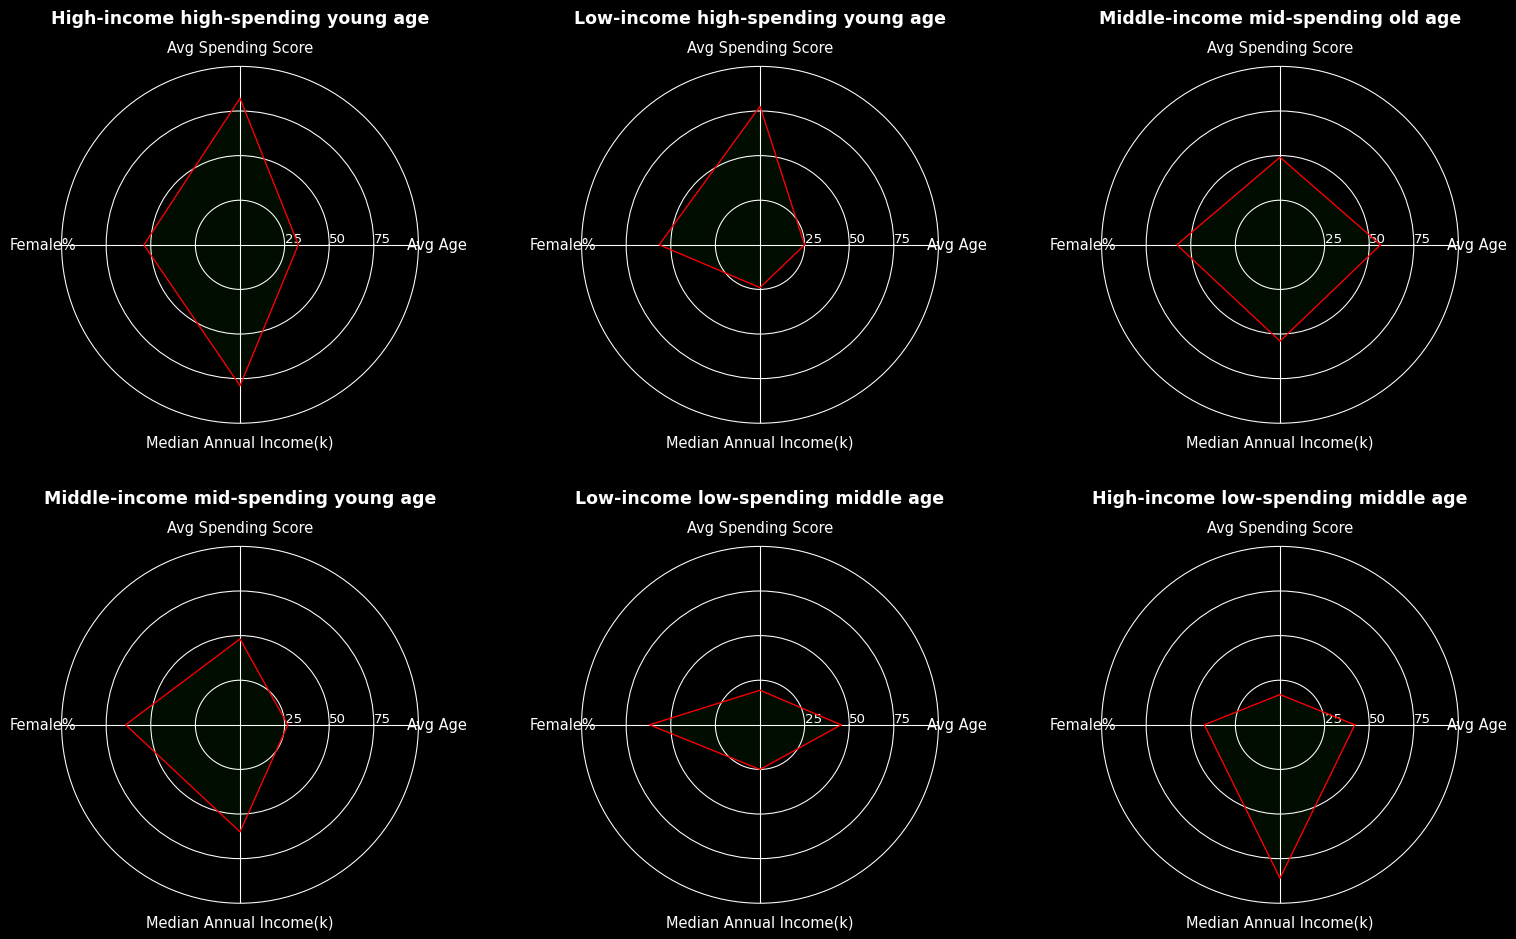

In [80]:
# create radar charts
def multiple_radars(df, columns, row):
    # Libraries
    from math import pi
    N = len(columns)
    columns_no_need = df[df.columns.difference(columns)]

    # But we need to repeat the first value to close the circular graph:
    values=df.loc[row].drop(columns_no_need).values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #plt.subplots_adjust(left=None, bottom=None, right=None, top=0.5, wspace=None, hspace=None)
    # Initialise the spider plot

    ax = plt.subplot(2, 3, row+1, polar=True) 

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], columns, size=11)
    plt.title(df.loc[row].group, size=13, y=1.1,fontweight="bold",  color='white')
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], 
               ["25","50","75"], size=10)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, color='r', linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'g', alpha=0.1)


my_dpi=96
plt.figure(figsize=(1600/my_dpi, 1000/my_dpi), dpi=my_dpi)


# number of variable
columns=['Avg Age', 'Avg Spending Score', 'Female%', 'Median Annual Income(k)']
for i in range(0,6): 
    multiple_radars(temp, columns, i)
plt.tight_layout(pad=3.0)